## Motivation

Consider, for example, that we want to perform [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS) to find a line of best fit between the points $x_1, \ldots, x_N$ in $p$ dimensional Euclidean space and labels $y_1, \ldots, y_N$.

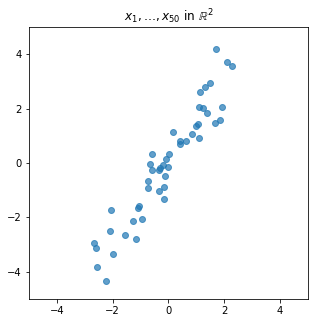

When the number of predictors $p$ is large, it is possible to end up with a linear regression model with high variance (and hence higher than desirable prediction error).
In addition, the resulting coefficients learned by the model may be harder to interpret than an alternative model with fewer predictors.

*Principal component analysis* (PCA) is a method for transforming points (such as $x_1, \ldots, x_N$ above) in a high dimensional space to points in a lower dimensional space by performing a sequence of scalar projections such that the resulting points account for as much of the original variance as possible.

Don't worry if this sounds vague; we'll make it precise below.

## Prerequisites

To understand this post, you will need to be familiar with the following concepts:

* [linear algebra](https://en.wikipedia.org/wiki/Linear_algebra)
* [variance](https://en.wikipedia.org/wiki/Variance)

## A review of scalar projections

We use $\Vert \cdot \Vert$ to denote the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance).
Given vectors $x$ and $v$, the *scalar projection* of $x$ onto $v$ is $\Vert x \Vert \cos \theta$ where $\theta$ is the angle between the two vectors.

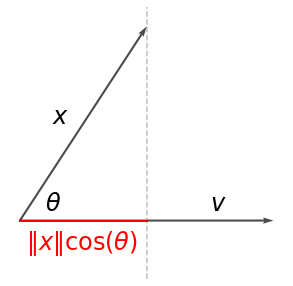

If $v$ is a unit vector (i.e., $\Vert v \Vert = 1$), the scalar projection can also be written $x \cdot v$ using the [dot product](https://en.wikipedia.org/wiki/Dot_product).

## Principal components

Before we define the principal components, let's introduce some equivalent representations of the data:
* Let $\mathbf{x}$ be random vector which takes on the values $x_1, \ldots, x_N$ with uniform probability.
* Let $X$ be a matrix with rows $x_1, \ldots, x_N$.

We assume that $\mathbf{x}$ has zero expectation.
If this is not true, we can always just center the data by subtracting $\mathbb{E} \mathbf{x}$ from each point.

We also assume $N > p$.
In the context of our motivating example of OLS, this means that there are more samples than there are predictors.

### First principal component

The *first principal component* is a unit vector $v_1$ along which the variance of the scalar projection of $\mathbf{x}$ onto $v_1$ is maximized.
That is,
\begin{equation}
    \operatorname{Var}(\mathbf{x} \cdot v_1)
    = \max_{\Vert v \Vert = 1} \operatorname{Var}(\mathbf{x} \cdot v).
\end{equation}
In other words, we are looking for the direction along which the data varies the most.

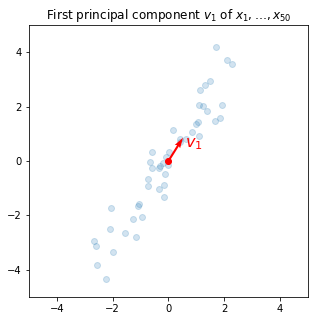

*Remark*.
The first principal component need not be unique: there may be two or more maximizers of the variance.
In this case, it is understood that any one of these maximizers can be chosen to be "the" first principal component.

But how do we compute the first principal component?
First, let's obtain an equivalent expression for the variance:
\begin{equation}
    N \operatorname{Var}(\mathbf{x} \cdot v)
    = \sum_{i=1}^N \left( x_i \cdot v \right)^2
    = \Vert Xv \Vert^2
    = \left(Xv\right)^\intercal \left(Xv\right)
    = v^\intercal X^\intercal X v.
\end{equation}

**Lemma.**
Let $A$ be a [positive semidefinite matrix](https://en.wikipedia.org/wiki/Definiteness_of_a_matrix).
Let $w$ be the maximizer of $v \mapsto v^\intercal A v$ over all (real) unit vectors.
Then, $w$ is an eigenvector of $A$ whose corresponding eigenvalue is maximal.

*Proof*.
Proceeding by the method of [Lagrange multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier), let $L(v) \equiv v^\intercal A v - \lambda (v^\intercal v - 1)$ where $\lambda$ is an arbitrary constant.
Then, $\nabla L(v) \propto A v - \lambda v$.
Since $w$ is a [critical point](https://en.wikipedia.org/wiki/Critical_point_(mathematics)) of $L$, it follows that $w$ is an eigenvector of $A$.
Moreover, denoting by $r$ the eigenvalue corresponding to $w$, since $w^\intercal A w = w^\intercal r w = r$, it follows that $r$ is maximal.
$\blacksquare$

The above suggests a simple way to compute the first principal component: applying [power iteration](https://en.wikipedia.org/wiki/Power_iteration) to $A \equiv X^\intercal X$.
Power iteration is an algorithm which returns, under reasonable conditions, an eigenvector corresponding to the largest eigenvalue of the input matrix.
The details of power iteration are outside the scope of this article.

The proof above also reveals that the largest eigenvalue of $X^\intercal X$, call it $\lambda_1$, is related to the variance explained by the first principal component by
\begin{equation}
    \operatorname{Var}(\mathbf{x} \cdot v_1) = \lambda_1 / N.
\end{equation}
$\sigma_1 = \sqrt{\lambda_1}$ is often referred to as the *first singular value* due to the connection between PCA on centered data and the [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) (SVD) of the matrix $X$.

### Remaining principal components

Given the first principal component $v_1$, we can transform our data so that all contributions in the $v_1$ direction are removed.
In particular, for each point $x_i$, we can create a new point
\begin{equation}
    x_i^{(2)} \equiv x_i - (x_i \cdot v_1) v_1.
\end{equation}

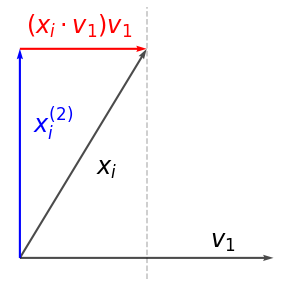

Equivalently, we can represent this transformation in the matrix form
\begin{equation}
  X^{(2)}
  \equiv X - X v_1 v_1^\intercal = X \left( I - v_1 v_1^\intercal \right)
\end{equation}
from which it is clear that this transformation is a [projection](https://en.wikipedia.org/wiki/Projection_(linear_algebra)) with matrix $P \equiv I - v_1 v_1^\intercal$.

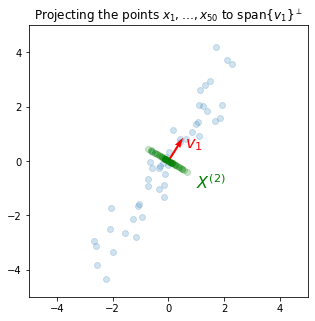

The *second* principal component $v_2$ of $X$ is defined as the *first* principal component of $X^{(2)}$.
Once computed, we can, as above, "project out" its contributions by taking $X^{(3)} \equiv X^{(2)}(I - v_2 v_2^\intercal)$.
Continuing in this way, we can define the third, fourth, etc. principal components.

We summarize the above procedure.
Let $X^{(1)} \equiv X$ and define
\begin{equation}
  X^{(k+1)}
  \equiv X^{(k)} \left( I - v_k v_k^\intercal \right) \text{ for } k \geq 1
\end{equation}
where $v_k$ is the *first* principal component of $X^{(k)}$.
We call $v_k$ the *$k$-th* principal component of $X$.
Analogously, the *$k$-th* singular value of $X$ is defined as the *first* singular value of $X^{(k)}$.

Since each projection reduces the dimensionality of the space, it is guaranteed that $X^{(p+1)} = 0$.
That is, it is only meaningful to talk about the first $p$ principal components.

As usual, the higher order singular values can also be interpreted in terms of the variance captured by higher order principal components.
In particular,
\begin{equation}
    \operatorname{Var}(\mathbf{x}^{(k)} \cdot v_k) = \sigma_k^2 / N
\end{equation}
where $\mathbf{x}^{(k)}$ is a random vector which, with uniform probability, is equal to one of the rows of $X^{(k)}$ (recall that each row corresponds to one of the original points $x_i$ after contributions from the first $k-1$ principal components have been removed).
By construction, $\sigma_1 \geq \cdots \geq \sigma_p$.

### Efficient computation

While the iterative definition of principal components given in the previous section is ideal for grasping the intuition behind PCA, it does not lend itself to an efficient numerical algorithm.
Fortunately, due to the result below, it turns out that we need only ever consider the spectrum and eigenvectors of $X^\intercal X$.

**Lemma.**
Let $\lambda_1 \geq \ldots \geq \lambda_p$ denote the eigenvalues of $X^\intercal X$.
Let $v_1, \ldots, v_p$ be corresponding eigenvectors, chosen to be orthonormal.
Then, $\sigma_k = \sqrt{\lambda_k}$ and $v_k$ are the $k$-th singular value and corresponding principal component of $X$.

*Proof*.
Fix $k$ and let $Y = X^{(k)}$ for brevity.
Note that
\begin{equation}
    Y v_j
    = X \left( I - v_1 v_1^\intercal \right) \cdots \left( I - v_{k-1} v_{k-1}^\intercal \right) v_j
    = X v_j [j \geq k]
\end{equation}
where $[\cdot]$ is the [Iverson bracket](https://en.wikipedia.org/wiki/Iverson_bracket).
Therefore,
\begin{equation}
    Y^\intercal Y v_j
    = v_j [j \geq k].
\end{equation}
In other words, $v_j$ is also an eigenvector of $Y^\intercal Y$ with eigenvalue $\lambda_j$ if $j \geq k$ and eigenvalue $0$ otherwise.
The desired result follows since the $k$-th principal component of $X$ is, by definition, the first principal component of $Y$.
$\blacksquare$

*Remark*.
NumPy/SciPy users can use the [`numpy.linalg.eigh`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) or [`scipy.linalg.eigh`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html) to get the eigenvalues and eigenvectors of $X^\intercal X$.
These routines return the eigenvalues in ascending order (smallest first).

## Basis transformation

### Lossless

Let $V = (v_1 \mid \cdots \mid v_p)$ denote the matrix whose columns consist of all $p$ principal components of $X$.
We can transform our points into "PCA space" by right-multiplying by $V$:
\begin{equation}
    Z \equiv X V
\end{equation}
This transformation is *lossless*: there is no reduction in dimensionality and we can transform from $Z$ back to $X$ by right-multiplying by $V^{-1} = V^\intercal$.

### Lossy

Recalling our motivation for studying PCA, we are usually more interested in a *lossy* transformation that reduces the dimensionality of the space.
First, we pick the target dimension $k < p$.
We transform our points by right-multiplying by $V_k = (v_1 \mid \cdots \mid v_k)$, the $p \times k$ matrix whose columns are the first $k$ principal components of $X$:
\begin{equation}
    Z_k \equiv X V_k.
\end{equation}
This allows us to, by construction, keep as much of the original variance as possible.

If you are interested in seeing an application of this dimensionality reduction, check out the [second post in this series](/blog/2019/principal_component_analysis_part_two/).